In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns

In [3]:
df  = pd.read_csv("../data/house_price.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.shape

(1460, 81)

In [8]:
df.shape[0] - df.isnull().sum()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
                 ... 
BedroomAbvGr     1460
KitchenAbvGr     1460
KitchenQual      1460
TotRmsAbvGrd     1460
Functional       1460
Fireplaces       1460
FireplaceQu       770
GarageType       1379
GarageYrBlt      1379
GarageFinish     1379
GarageCars       1460
GarageArea       1460
GarageQual       1379
GarageCond       1379
PavedDrive

In [9]:
round(((len(df) - df.isnull().sum())/len(df))*100, 2)

Id               100.00
MSSubClass       100.00
MSZoning         100.00
LotFrontage       82.26
LotArea          100.00
Street           100.00
Alley              6.23
LotShape         100.00
LandContour      100.00
Utilities        100.00
LotConfig        100.00
LandSlope        100.00
Neighborhood     100.00
Condition1       100.00
Condition2       100.00
BldgType         100.00
HouseStyle       100.00
OverallQual      100.00
OverallCond      100.00
YearBuilt        100.00
YearRemodAdd     100.00
RoofStyle        100.00
RoofMatl         100.00
Exterior1st      100.00
Exterior2nd      100.00
MasVnrType        99.45
MasVnrArea        99.45
ExterQual        100.00
ExterCond        100.00
Foundation       100.00
                  ...  
BedroomAbvGr     100.00
KitchenAbvGr     100.00
KitchenQual      100.00
TotRmsAbvGrd     100.00
Functional       100.00
Fireplaces       100.00
FireplaceQu       52.74
GarageType        94.45
GarageYrBlt       94.45
GarageFinish      94.45
GarageCars      

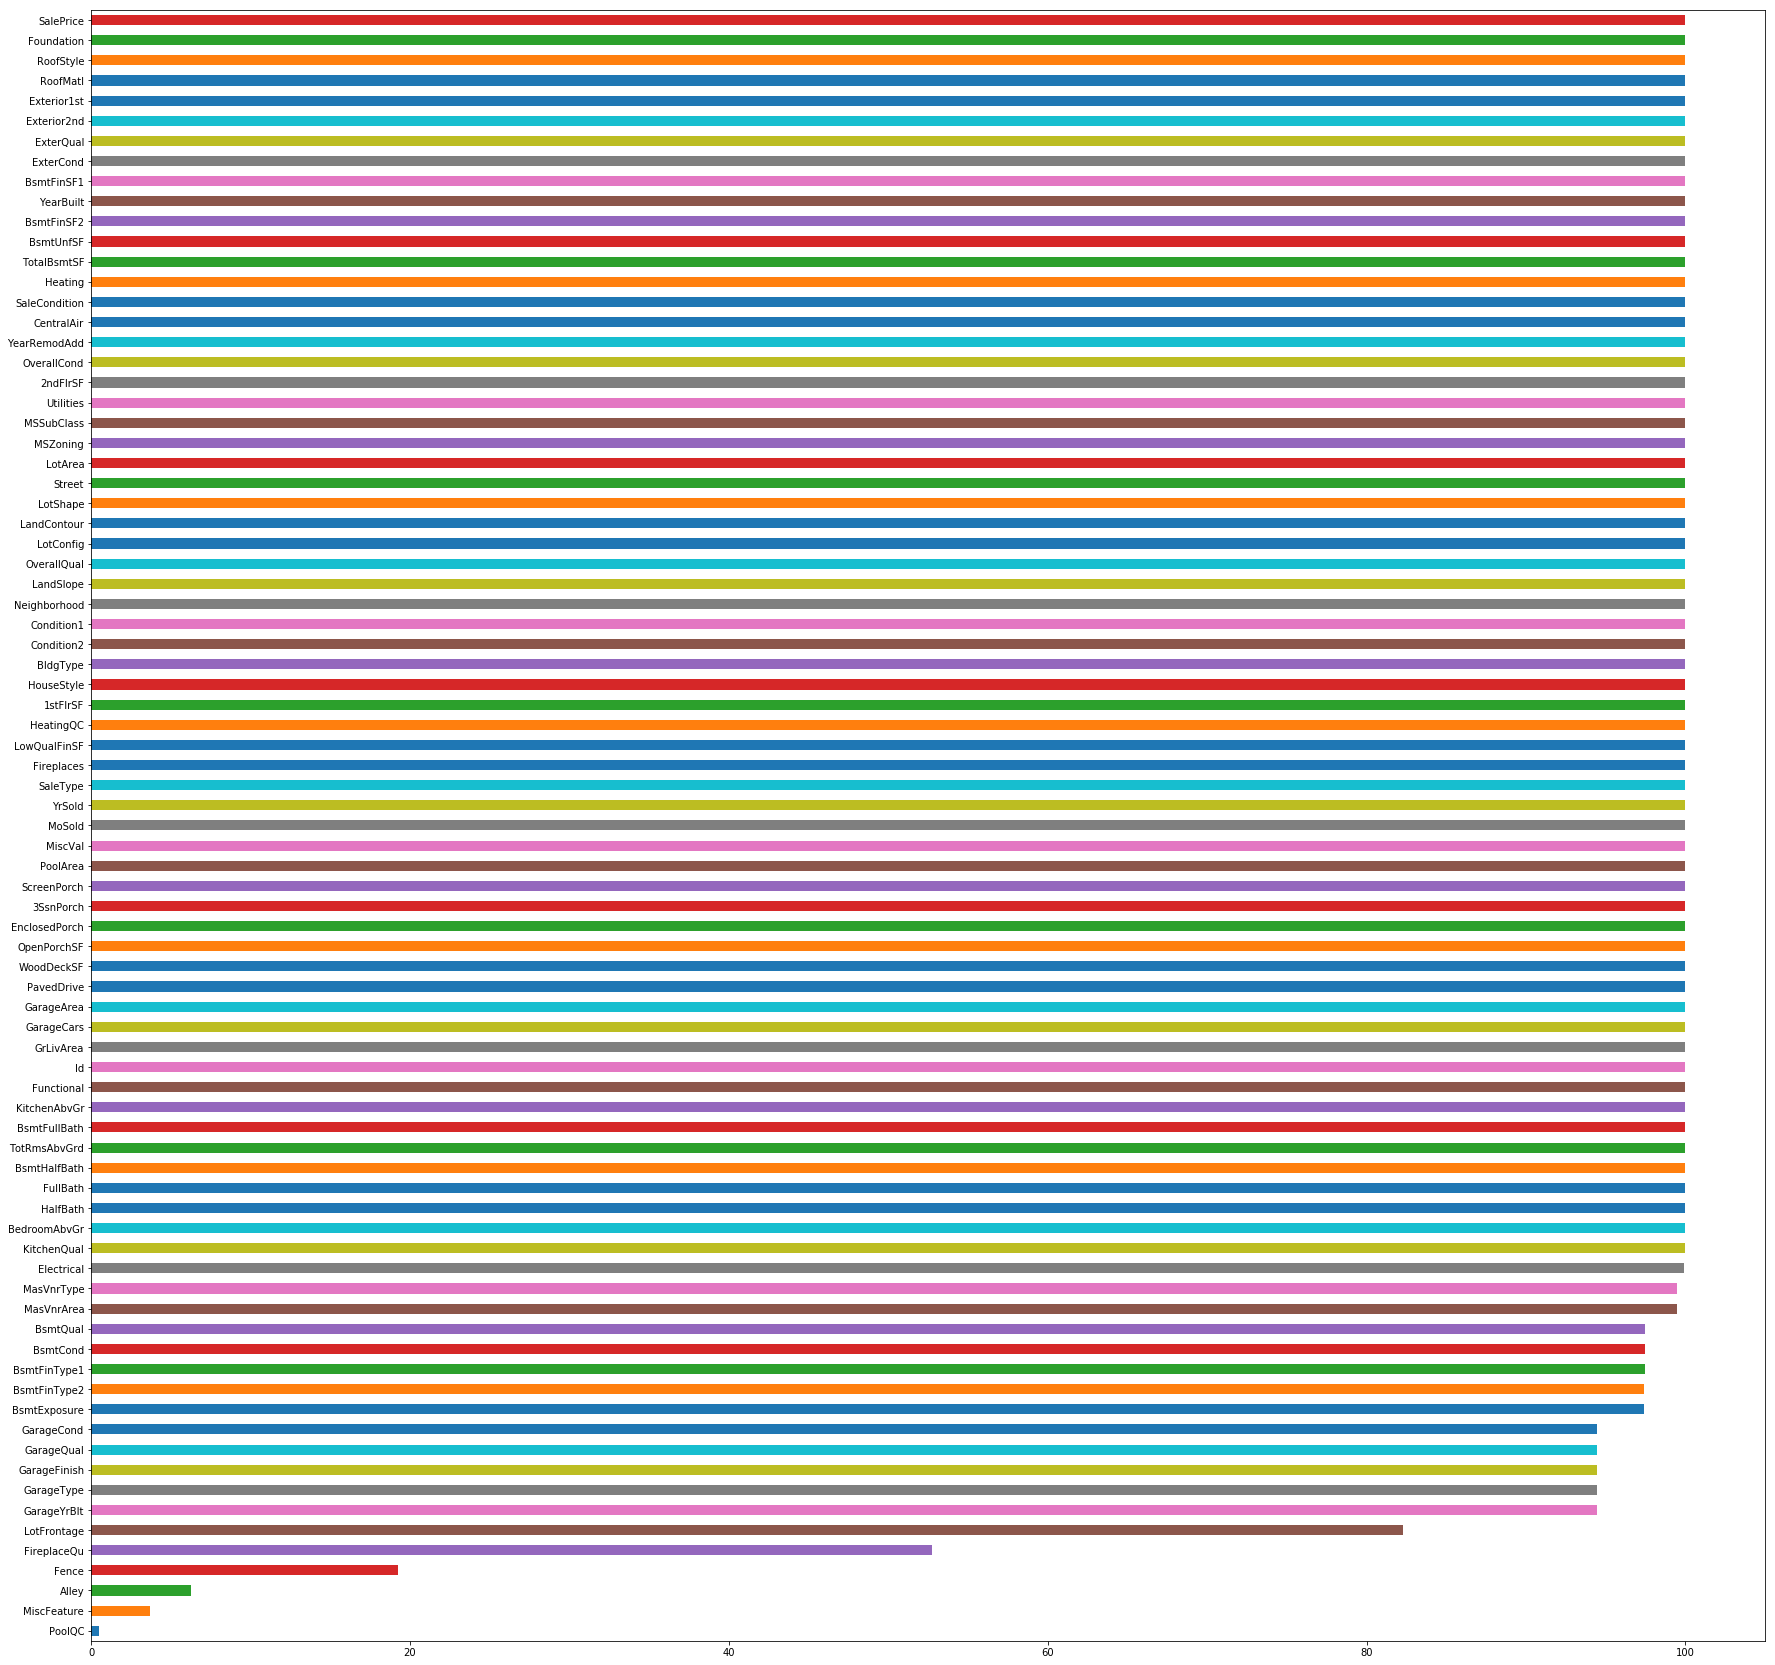

In [15]:
plt.subplots(figsize=(30, 30))
round(((len(df) - df.isnull().sum())/len(df))*100, 2).sort_values().plot.barh()

In [18]:
df2 = df[[col for col in df if df[col].count()/ len(df) >=0.3]]

In [21]:
df.shape

(1460, 81)

In [23]:
df2.shape

(1460, 77)

In [36]:
del df2["Id"]

In [24]:
[col for col in df if col not in df2.columns]

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [25]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

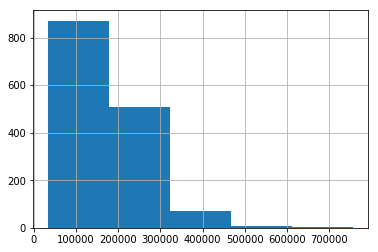

In [31]:
df.SalePrice.hist(bins=5)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


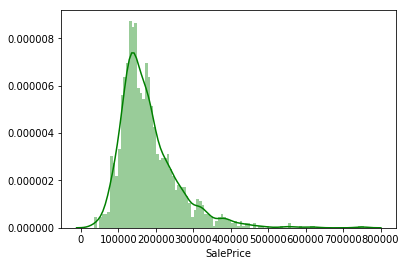

In [34]:
sns.distplot(df.SalePrice, color='g', 
             bins=100)

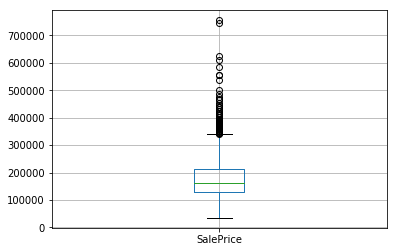

In [41]:
df2[["SalePrice"]].boxplot()

In [42]:
f_q = np.percentile(df.SalePrice, 25)
l_q = np.percentile(df.SalePrice, 75)

In [44]:
IQR = 1.5*(l_q -f_q)

In [45]:
max_value = l_q + IQR
min_value = f_q - IQR

In [46]:
max_value, min_value

(340037.5, 3937.5)

In [53]:
df2.loc[(df2.SalePrice > max_value) | (df2.SalePrice < min_value),:].shape

(61, 76)

In [52]:
df2.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
                  ...   
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64


In [59]:
list(set(df2.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [60]:
df_num = df2.select_dtypes(include=['float64', 'int64'])

In [62]:
df_num.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DCD7C4358>,
      dtype=object)

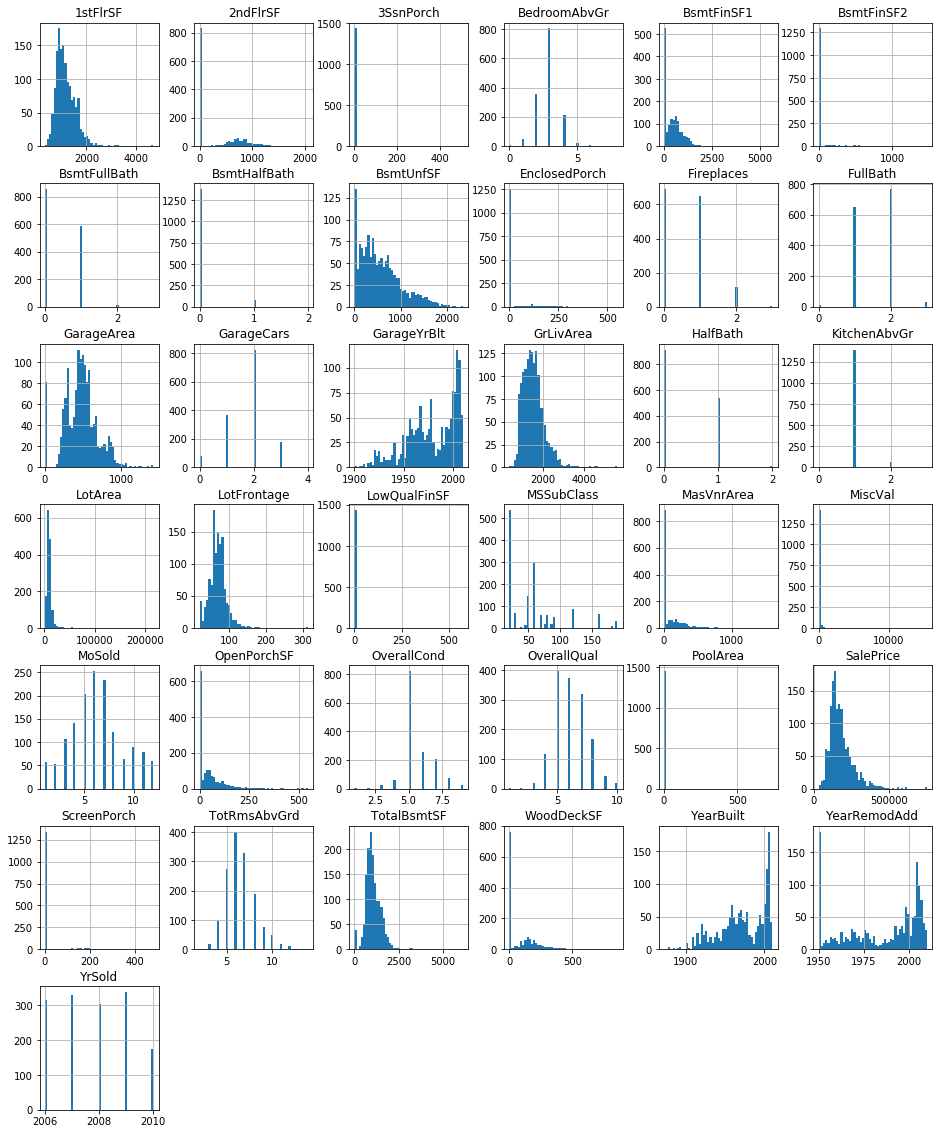

In [63]:
df_num.hist(figsize=(16, 20), bins=50)

In [66]:
df_num.corr()['SalePrice']

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [71]:
df_num_corr = df_num.corr()

In [82]:
df_num_corr[df_num_corr['SalePrice'] > 0.6]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
SalePrice,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


In [84]:
df_num_corr = df_num.corr()["SalePrice"][:-1]

In [87]:
golden_feature = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)

In [88]:
golden_feature

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

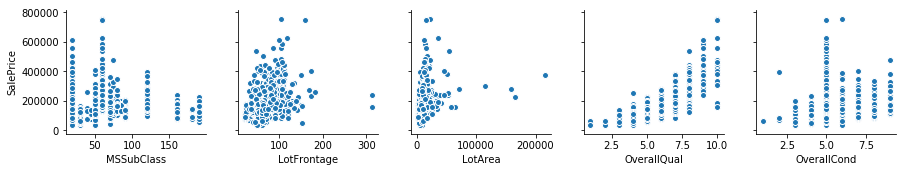

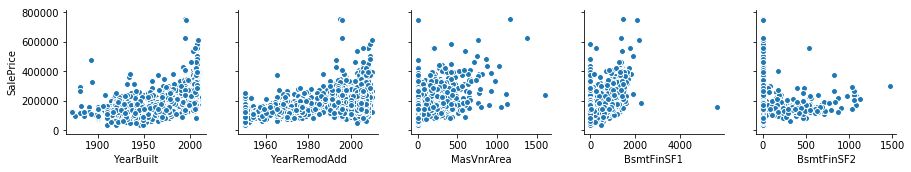

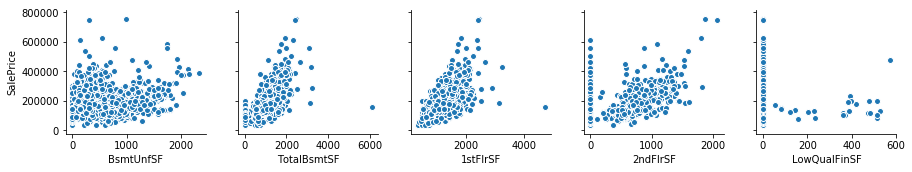

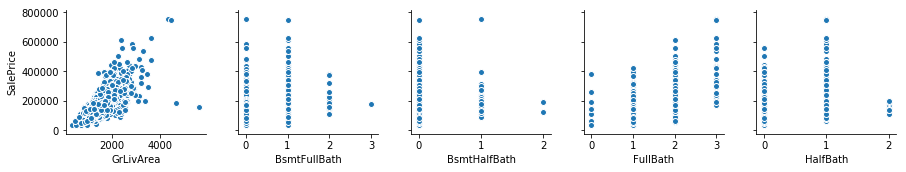

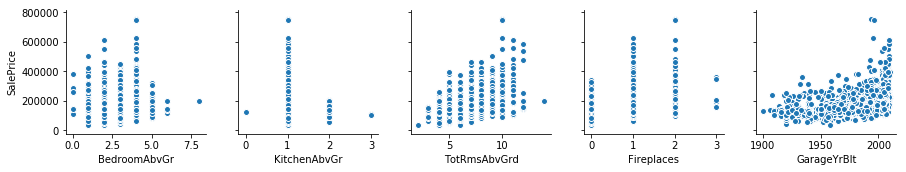

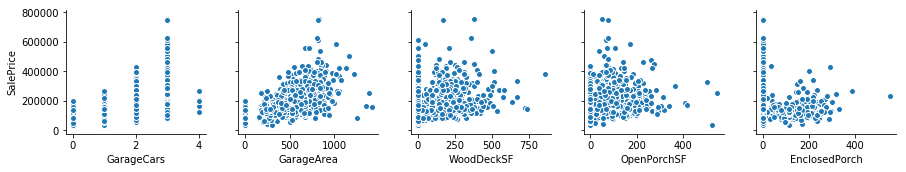

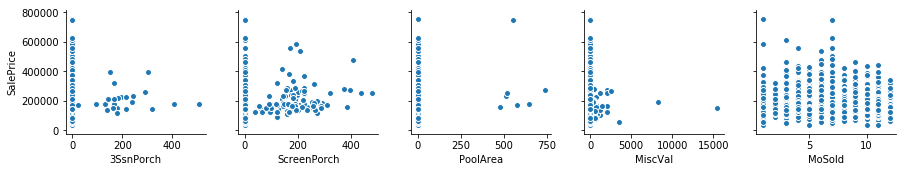

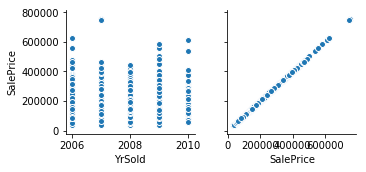

In [89]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num, x_vars=df_num.columns[i:i+5],
                y_vars=["SalePrice"])

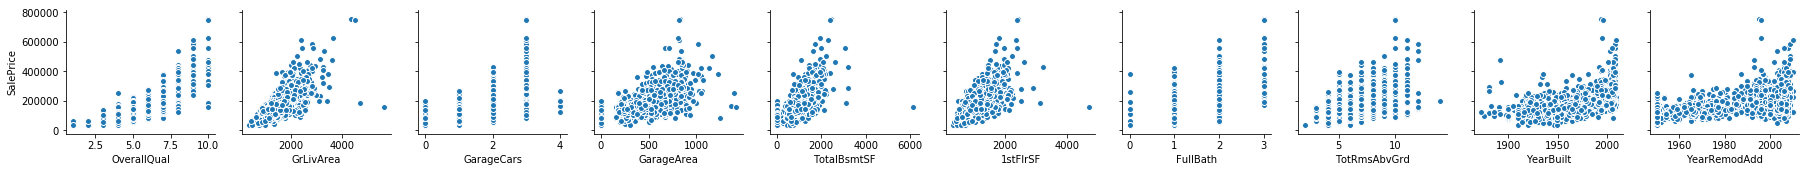

In [91]:
sns.pairplot(data=df_num, x_vars=golden_feature.index, 
            y_vars=["SalePrice"])

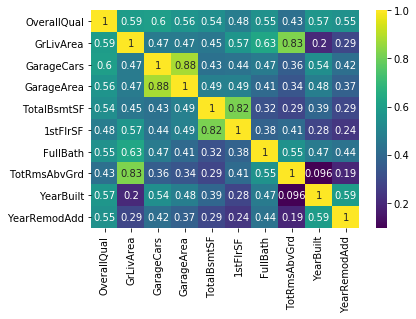

In [105]:
sns.heatmap(df_num.loc[:, golden_feature.index].corr(), 
            annot=True, cmap='viridis')